In [3]:
from IPython.display import display
import spot
from spot.jupyter import display_inline
spot.setup(show_default='.tvb')

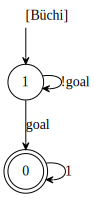

In [4]:
# System specification
aut_sys = spot.translate('F(goal)', 'Buchi', 'state-based', 'complete'); aut_sys.show("v")

In [5]:
# How to get rid of the redundant transition-based acceptance label from state 0 to 2?
print(aut_sys.to_str('hoa'))

HOA: v1
States: 2
Start: 1
AP: 1 "goal"
acc-name: Buchi
Acceptance: 1 Inf(0)
properties: trans-labels explicit-labels state-acc complete
properties: deterministic stutter-invariant terminal
--BODY--
State: 0 {0}
[t] 0
State: 1
[0] 0
[!0] 1
--END--


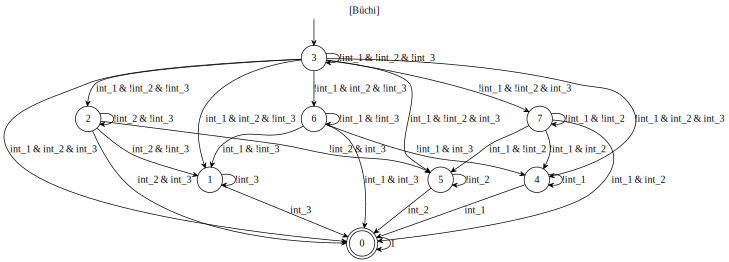

In [6]:
# Tester spec:
aut_test = spot.translate('F(int_1) & F(int_2) & F(int_3)', 'Buchi', 'state-based', 'complete'); aut_test.show("v")

In [ ]:
aut_prod, states_prod = async_prod(aut_sys, aut_test); aut_prod.show("v")

In [ ]:
states_prod

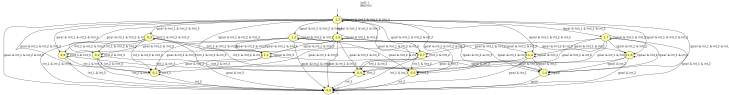

In [7]:
sync_prod = spot.product(aut_sys, aut_test); sync_prod

In [8]:
print(sync_prod.to_str('hoa'))

HOA: v1
States: 16
Start: 0
AP: 4 "goal" "int_1" "int_2" "int_3"
acc-name: Buchi
Acceptance: 1 Inf(0)
properties: trans-labels explicit-labels state-acc complete
properties: deterministic stutter-invariant terminal
--BODY--
State: 0
[0&1&2&3] 1
[0&1&2&!3] 2
[0&1&!2&!3] 3
[0&!1&!2&!3] 4
[0&!1&2&3] 5
[0&1&!2&3] 6
[0&!1&2&!3] 7
[0&!1&!2&3] 8
[!0&1&2&3] 9
[!0&1&2&!3] 10
[!0&1&!2&!3] 11
[!0&!1&!2&!3] 0
[!0&!1&2&3] 12
[!0&1&!2&3] 13
[!0&!1&2&!3] 14
[!0&!1&!2&3] 15
State: 1 {0}
[t] 1
State: 2
[3] 1
[!3] 2
State: 3
[2&3] 1
[2&!3] 2
[!2&!3] 3
[!2&3] 6
State: 4
[1&2&3] 1
[1&2&!3] 2
[1&!2&!3] 3
[!1&!2&!3] 4
[!1&2&3] 5
[1&!2&3] 6
[!1&2&!3] 7
[!1&!2&3] 8
State: 5
[1] 1
[!1] 5
State: 6
[2] 1
[!2] 6
State: 7
[1&3] 1
[1&!3] 2
[!1&3] 5
[!1&!3] 7
State: 8
[1&2] 1
[!1&2] 5
[1&!2] 6
[!1&!2] 8
State: 9
[0] 1
[!0] 9
State: 10
[0&3] 1
[0&!3] 2
[!0&3] 9
[!0&!3] 10
State: 11
[0&2&3] 1
[0&2&!3] 2
[0&!2&!3] 3
[0&!2&3] 6
[!0&2&3] 9
[!0&2&!3] 10
[!0&!2&!3] 11
[!0&!2&3] 13
State: 12
[0&1] 1
[0&!1] 5
[!0&1] 9
[!0&!1

In [11]:
print(len(sync_prod.get_product_states()))

16


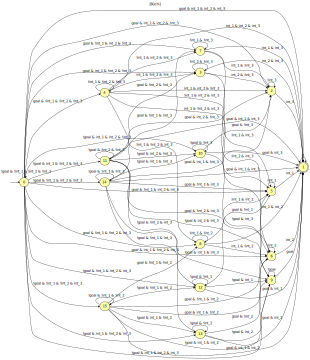

0: (1, 3)
1: (0, 0)
2: (0, 1)
3: (0, 2)
4: (0, 3)
5: (0, 4)
6: (0, 5)
7: (0, 6)
8: (0, 7)
9: (1, 0)
10: (1, 1)
11: (1, 2)
12: (1, 4)
13: (1, 5)
14: (1, 6)
15: (1, 7)


In [13]:
display(sync_prod.show('.1'))
pairs = sync_prod.get_product_states()
for s in range(sync_prod.num_states()):
    print("{}: {}".format(s, pairs[s]))